# Importing Libraries and loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Ashutosh Patel/OneDrive/Desktop/Assessment/task/Fraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


##  Data Cleaning

### 1. Checking for missing values

In [5]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


### 2.  Checking for outliers in amount column

In [6]:
df['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

### Calculating IQR for detecting outliers 

In [7]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

# Set lower bound to 0 if negative
lower_bound = max(0,Q1-1.5*IQR)
upper_bound = Q3 + 1.5 * IQR

print('Lower bound for outliers: ', lower_bound)
print('Upper bound for outliers: ', upper_bound)

Lower bound for outliers:  0
Upper bound for outliers:  501719.33875


#### Negative Lower bounds can be ignored and set to zero as amount cannot be negative.

In [8]:
# Detecting outliers

outliers = df[(df['amount'] < lower_bound) | (df['amount']> upper_bound)]

print(f"\nNumber of outliers: {len(outliers)}")
outliers.info()


Number of outliers: 338078
<class 'pandas.core.frame.DataFrame'>
Int64Index: 338078 entries, 85 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            338078 non-null  int64  
 1   type            338078 non-null  object 
 2   amount          338078 non-null  float64
 3   nameOrig        338078 non-null  object 
 4   oldbalanceOrg   338078 non-null  float64
 5   newbalanceOrig  338078 non-null  float64
 6   nameDest        338078 non-null  object 
 7   oldbalanceDest  338078 non-null  float64
 8   newbalanceDest  338078 non-null  float64
 9   isFraud         338078 non-null  int64  
 10  isFlaggedFraud  338078 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 31.0+ MB


#### Outlier Detection using Scatter Plot (Amount vs. Old Balance Origin)

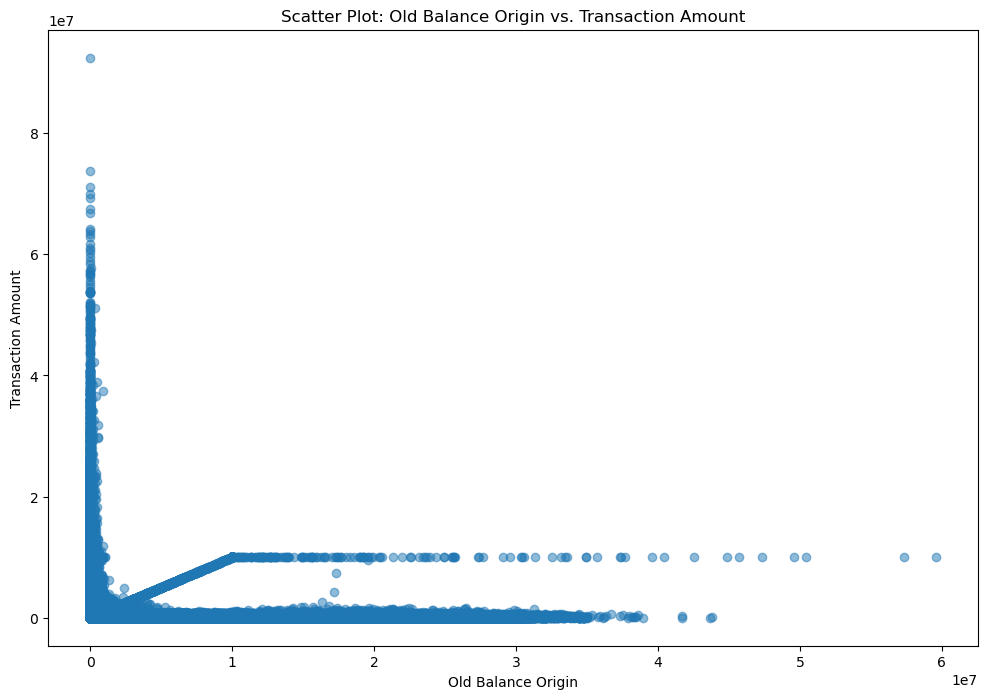

In [19]:
plt.figure(figsize = (12,8))
plt.scatter(y = df['amount'], x = df['oldbalanceOrg'], alpha = 0.5)
plt.title('Scatter Plot: Old Balance Origin vs. Transaction Amount')
plt.xlabel('Old Balance Origin')
plt.ylabel('Transaction Amount')
plt.show()

### Exploratory Data Analysis 

#### a. Distribution of transaction amounts


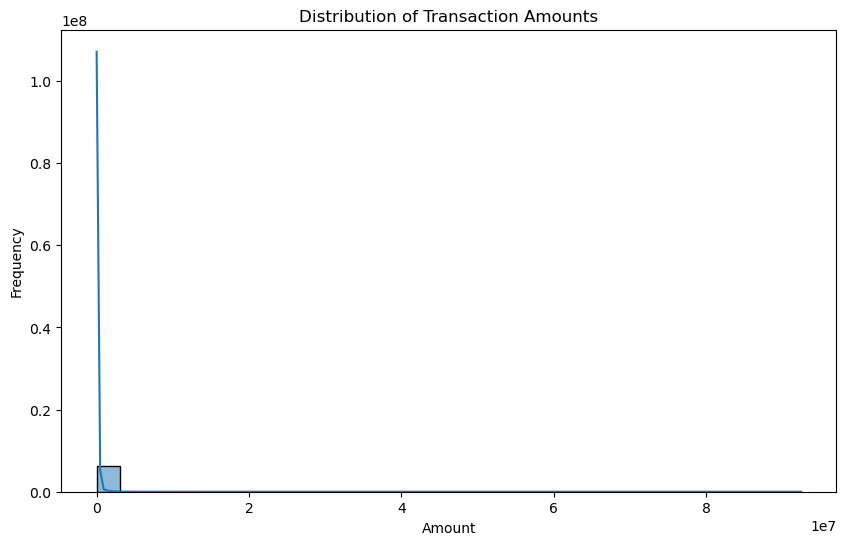

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], kde=True, bins=30)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

##### The histogram generated for the distribution of transaction amounts shows that most of the transaction values are clustered near zero, with a few large transactions creating a long tail on the right side.This is common for financial datasets.

#### b. Frequency of different transaction types

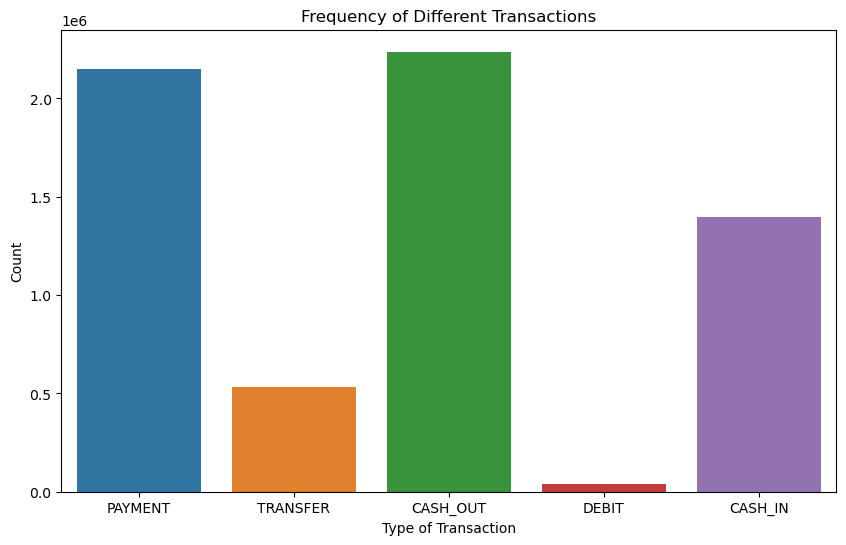

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x ='type')
plt.title('Frequency of Different Transactions')
plt.xlabel('Type of Transaction')
plt.ylabel('Count')
plt.show()

#### c. Proportion of fraudulent transactions

In [13]:
fraud_proportion = df['isFraud'].value_counts(normalize = True)
print("\nProportion of Fraudulent Transactions:")
print(fraud_proportion)


Proportion of Fraudulent Transactions:
0    0.998709
1    0.001291
Name: isFraud, dtype: float64


#### d. Correlation  Analysis

C:\Users\Ashutosh Patel\AppData\Local\Temp\ipykernel_13744\674897284.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

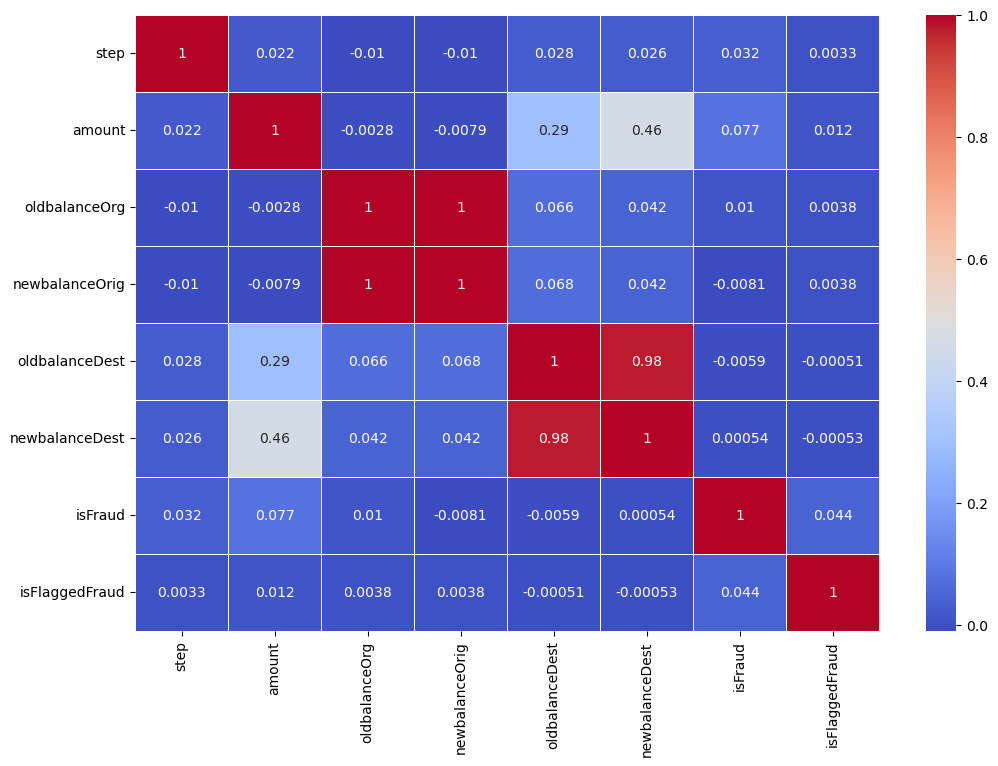

In [14]:
plt.figure(figsize = (12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix , annot = True ,cmap = 'coolwarm', linewidths = 0.5)

### Handling outliers 